Link to source
https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/


Accuracy : 0.9666666666666667
[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]


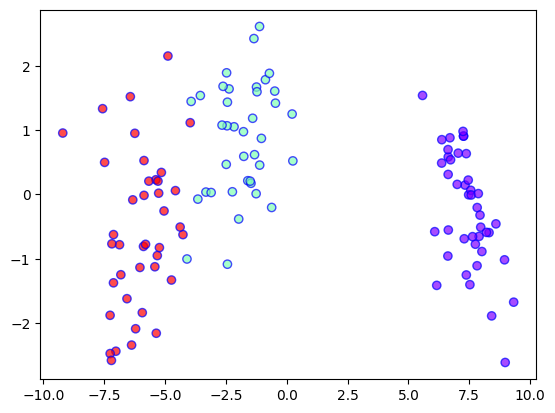

In [ ]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# The data from the url has no column names, I have called them cls
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
# The target variable is 'Class', as we want to classify these flowers.
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance to obtain
# a Gaussian distribution
sc = StandardScaler()
X = sc.fit_transform(X) # Fit to data, then transform it.
# Encode target labels with value between 0 and n_classes-1. In this dataset,
# as we have three different classes of flowers, the code is 0, 1 or 2
le = LabelEncoder()
y = le.fit_transform(y)
# We use train_test_split to separate the data set into an 80% training and
# 20% test (test_size = 0.2). As we have a matrix of features, X is in capital
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
# We had 4 features in the matrix X and a fith column, with y-dataset. Now, we
# try to reduce these features to 2 features.
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
# We don't need to transform y_test, as the model now is trained
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)

# classify using random forest classifier. We use the random forest classification
# to check the accuracy of our model prediction from the train dataset.
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_m)
